# EXCEED Prolific Study: Finding the Fantastic Four

Within this notebook, we will analyze the results of our pilot study where we asked participants to go over 8 different Python buggy code snippets, and their associated standard interpreter error messages, and provide ratings on a 1-5 scale for several statements, namely:
- "_This code snippet is difficult to understand._"
- "_I would find it challenging to resolve the issue in this code snippet._"
- "_Reading this error message feels mentally demanding._"
- "_This error message is useful for identifying the problem._"

The goal of this analysis isn't to necessarily find a "best" or "worst" error message (and code snippet), but rather to identify the four Python code snippets and their associated error messages that we will later use within the actual main Prolific study. We will refer to these as the "Fantastic Four".

## Step 0: Install Required Libraries

In [14]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 1: Load the Data

In [15]:
import pandas as pd

# Set the path to the CSV file which contains the results of the pilot study
file_path = "../data/pilot_study_results.csv"

# Load the data into a DataFrame
df = pd.read_csv(file_path)

## Step 2: Keep Only Rows with Attention Check Passed

In [16]:
# Define the column indices for each snippet
snippet_columns = {
    'snippet_1': list(range(1, 5)),
    'snippet_2': list(range(5, 9)),
    'snippet_3': list(range(9, 13)),
    'snippet_4': list(range(13, 18)),  # includes attention check
    'snippet_5': list(range(18, 22)),
    'snippet_6': list(range(22, 26)),
    'snippet_7': list(range(26, 30)),
    'snippet_8': list(range(30, 34)),
}

# Remove rows where the attention check failed (attention check column should be at index 16)
attention_check_col = df.columns[16]  # Get the actual column name at index 16

# Number of participants in the study before filtering
num_participants_before = len(df)
print(f"Number of participants before filtering for attention check: {num_participants_before}")

# Filter rows only where attention check is passed (5 means strongly agree)
filtered_df = df[df[attention_check_col] == 5]

# Number of participants in the study after filtering for attention check
num_participants_after = len(filtered_df)
print(f"Number of participants after filtering for attention check: {num_participants_after}")

# Adjust snippet_columns for snippet_4 to exclude the attention check column
snippet_columns_adjusted = snippet_columns.copy()
snippet_columns_adjusted['snippet_4'] = [13, 14, 15, 17]  # Exclude the attention check column (index 16)

# Extract questions and results for each snippet
snippets = {}
for key, cols in snippet_columns_adjusted.items():
    col_names = filtered_df.columns[cols]
    snippets[key] = filtered_df[col_names]


Number of participants before filtering for attention check: 13
Number of participants after filtering for attention check: 13


## Step 3: Analyze the Data

In this step we will perform the following analyses:
1. Calculate the average ratings for each snippet for each question.
2. Rank the snippets based on their average ratings for each question.
3. Plot the average ratings for each snippet for each question.

### Step 3.1: Calculate Average Ratings for Each Snippet For Each Question

In this step, we will calculate the average ratings for each question across all snippets. This will help us understand how participants rated each snippet in terms of difficulty, challenge, mental demand, and usefulness of the error message. We will plot a bar chart for each question showing the average ratings for all snippets.

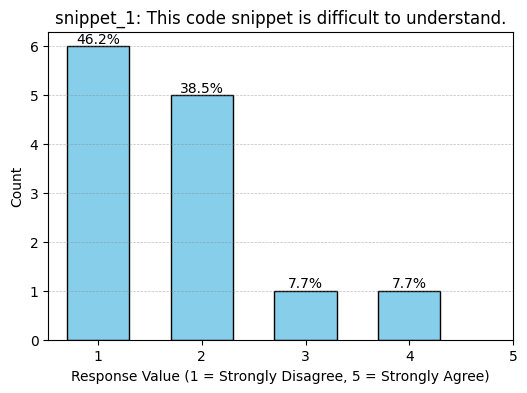

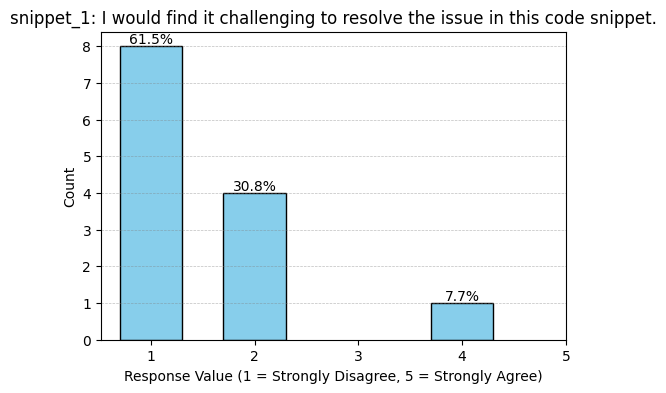

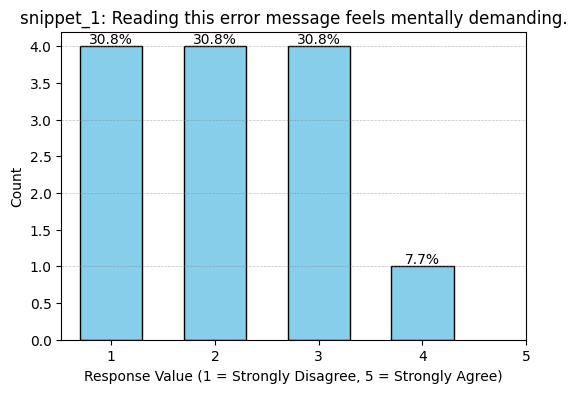

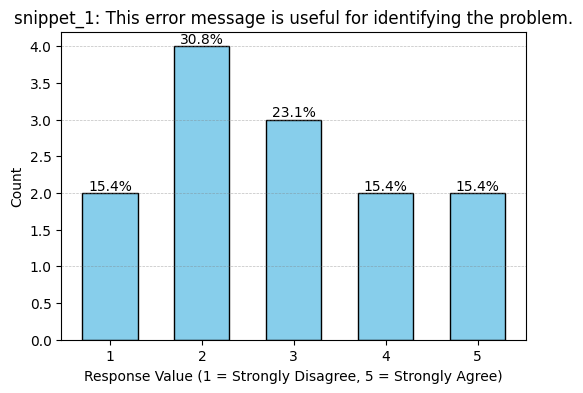

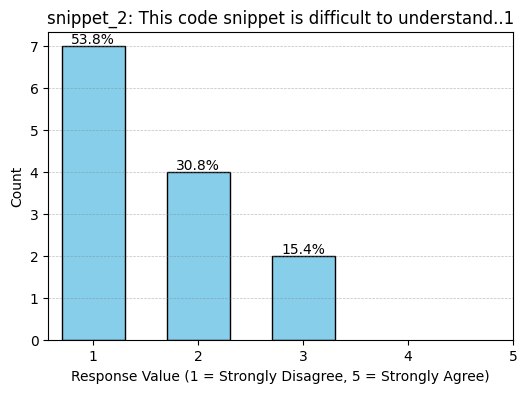

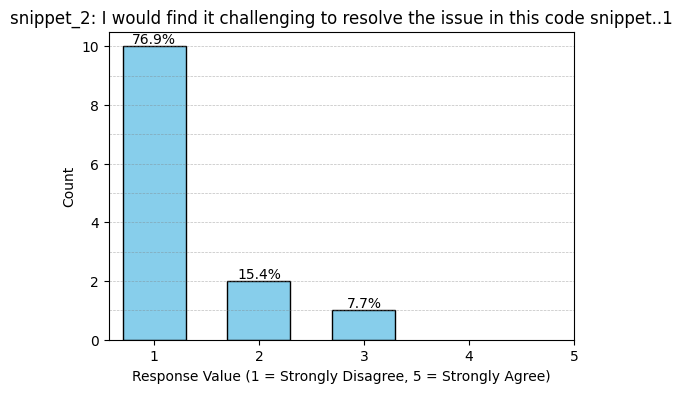

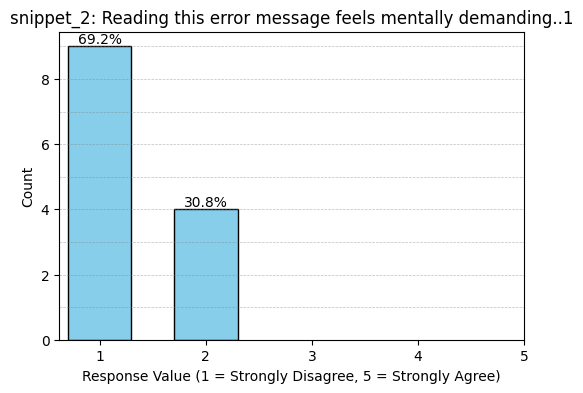

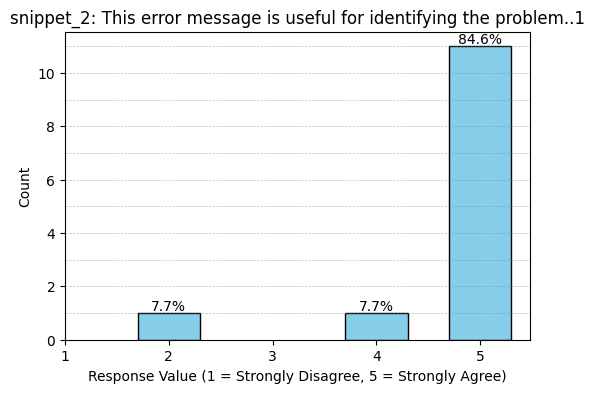

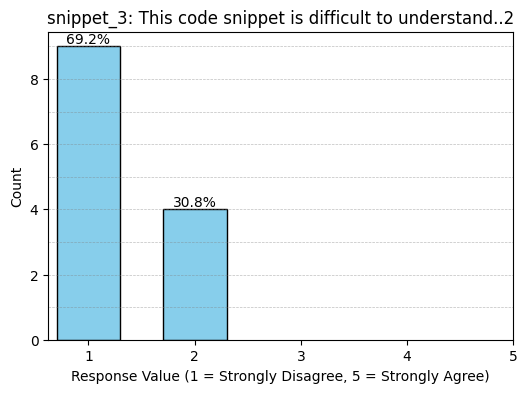

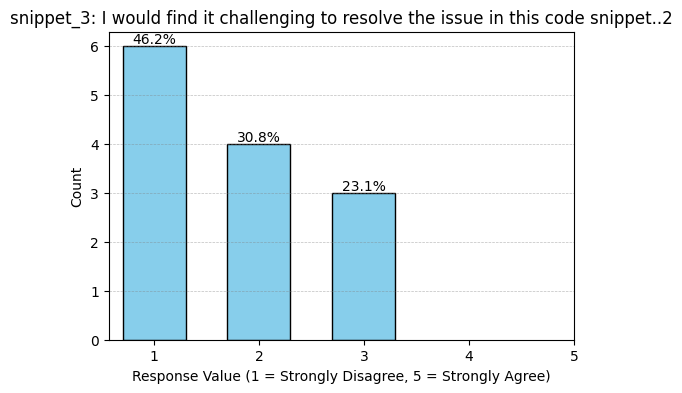

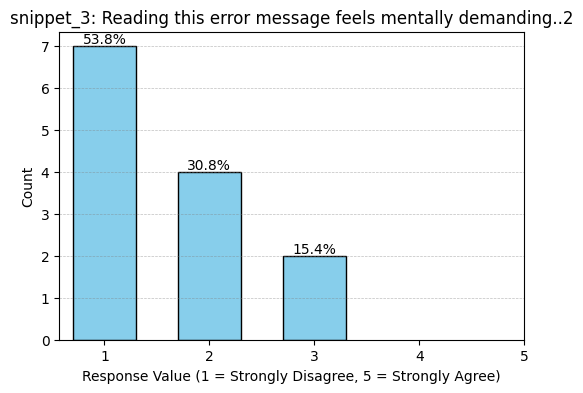

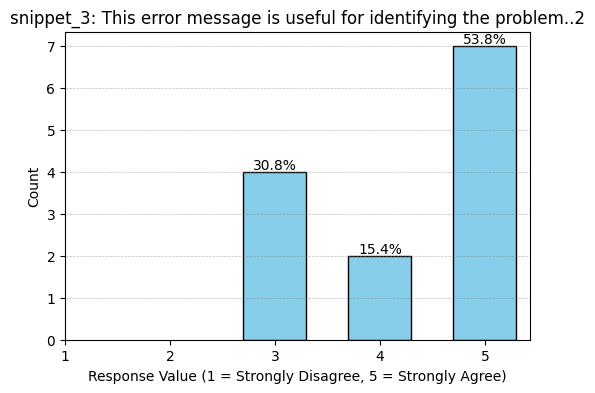

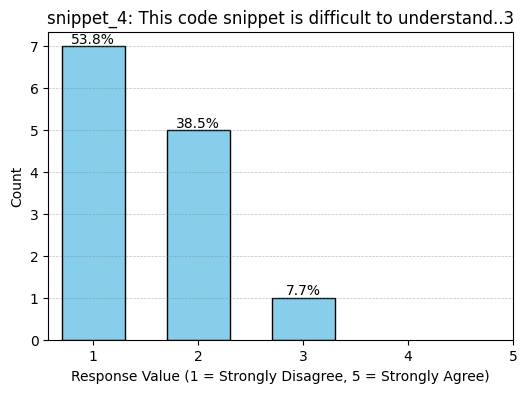

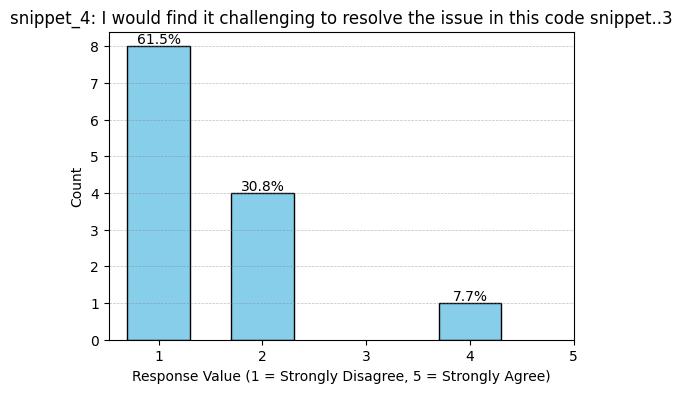

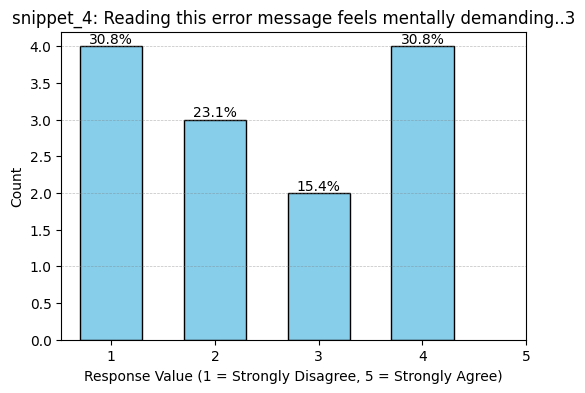

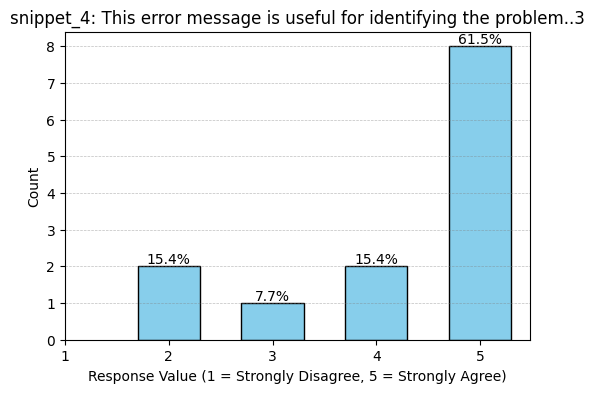

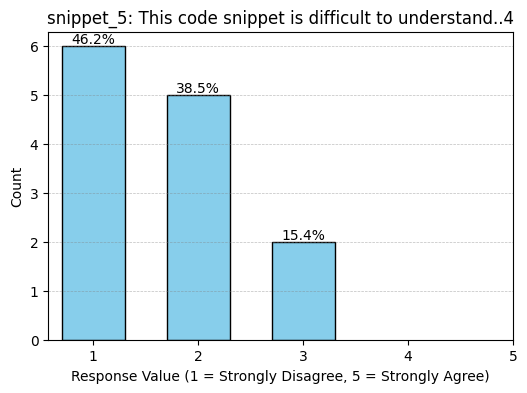

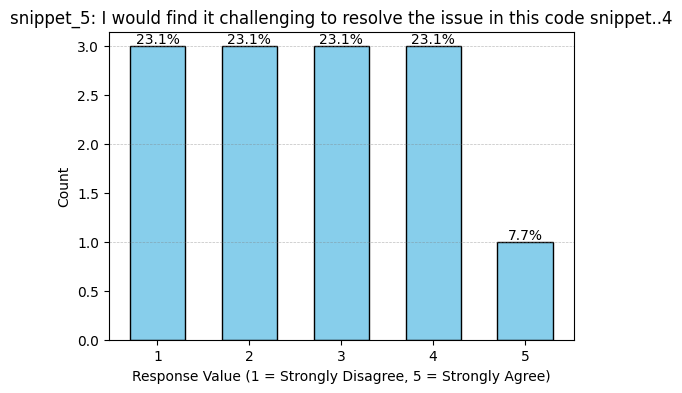

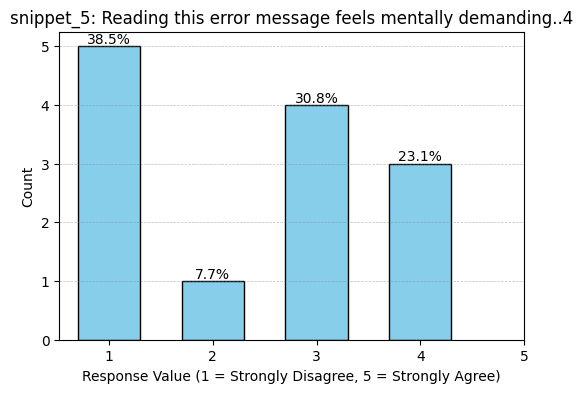

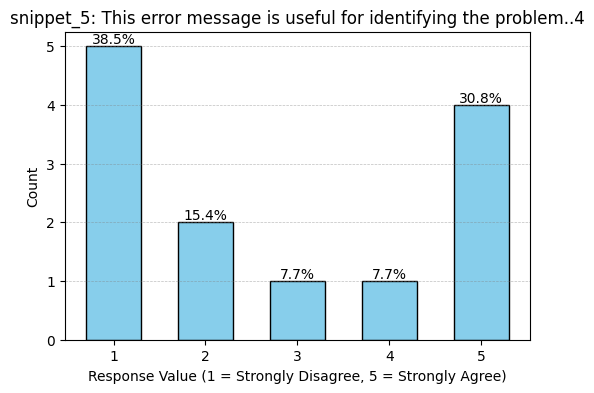

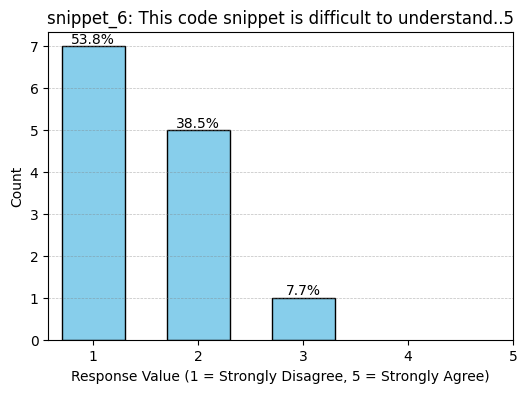

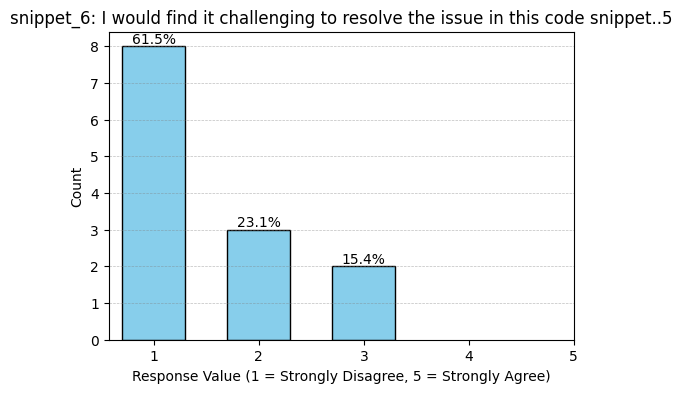

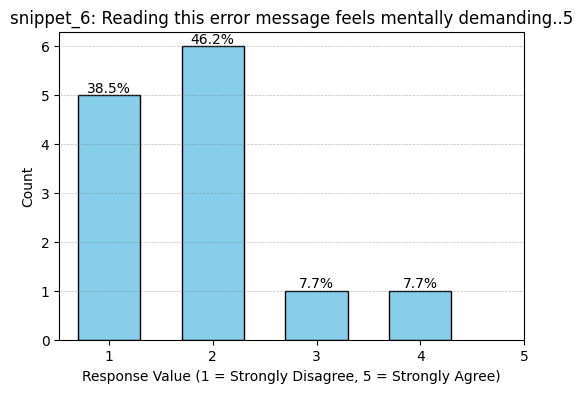

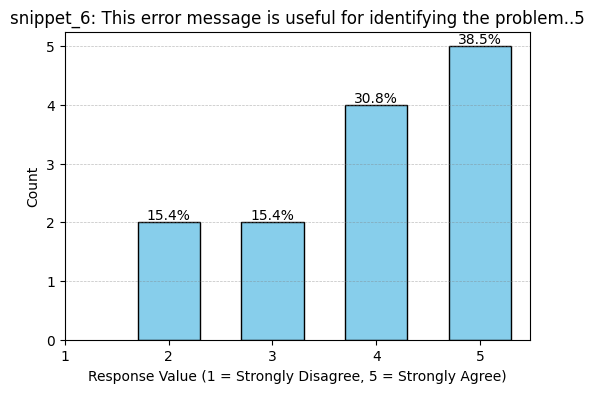

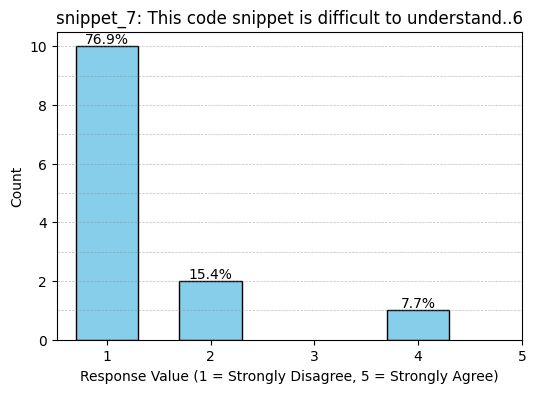

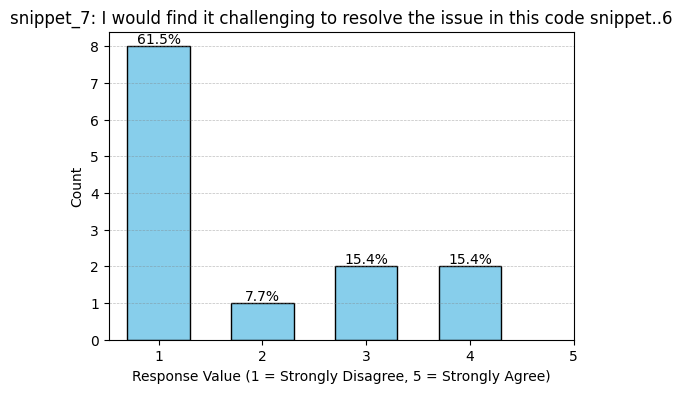

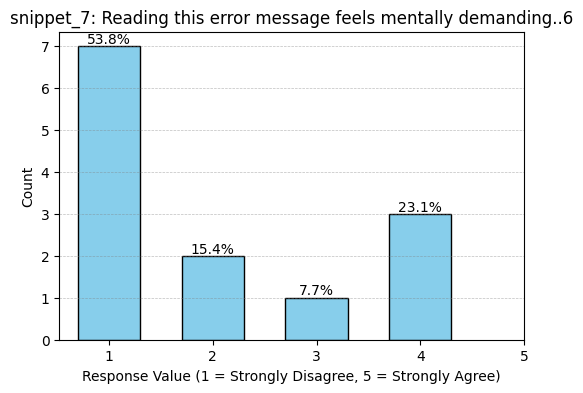

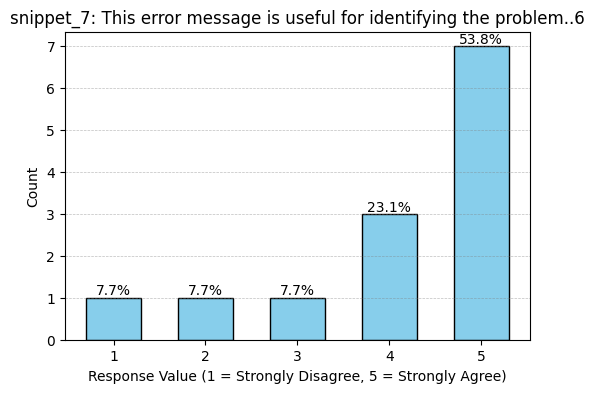

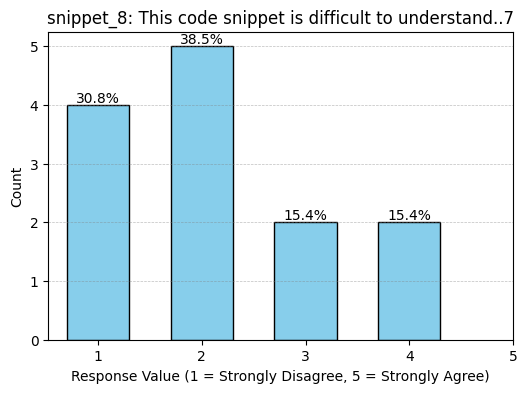

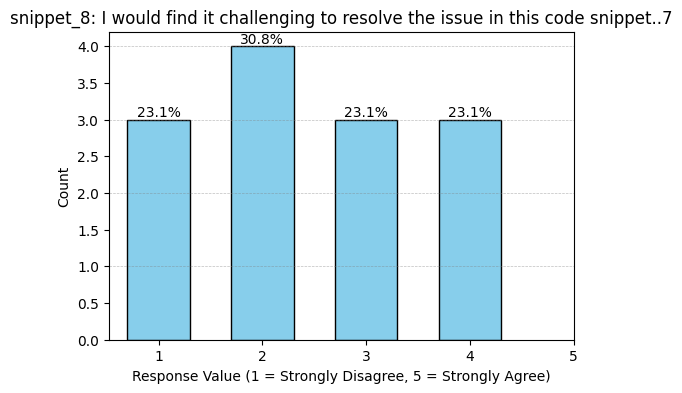

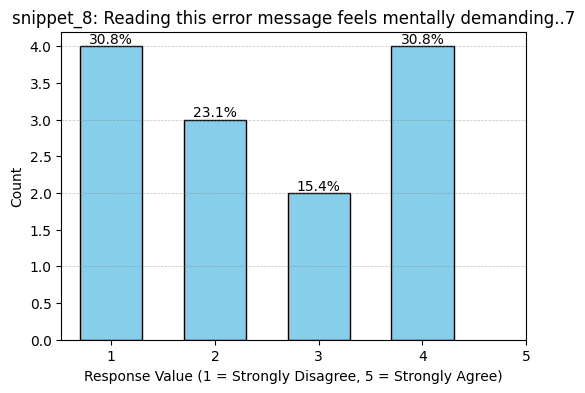

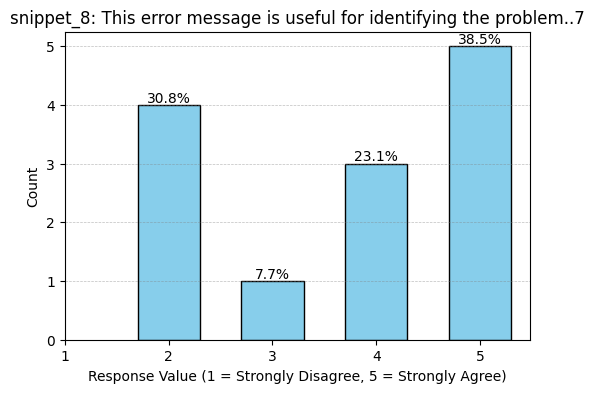

In [17]:
import matplotlib.pyplot as plt

# Plot histograms for each snippet and each question, with percentages on each bar
for snippet_name, snippet_df in snippets.items():
    for col in snippet_df.columns:
        plt.figure(figsize=(6, 4))
        data = snippet_df[col].dropna().astype(int)
        counts = data.value_counts().sort_index()
        total = counts.sum()
        bars = plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black', align='center', width=0.6)
        plt.title(f"{snippet_name}: {col}")
        plt.xlabel("Response Value (1 = Strongly Disagree, 5 = Strongly Agree)")
        plt.ylabel("Count")
        plt.xticks(range(1, 6))

        # Annotate each bar with percentage
        for bar in bars:
            height = bar.get_height()
            percent = f"{height / total * 100:.1f}%"
            plt.text(bar.get_x() + bar.get_width() / 2, height, percent, ha='center', va='bottom', fontsize=10)

        # Add horizontal lines for each integer value on the y-axis
        y_min, y_max = plt.gca().get_ylim()
        for y in range(int(y_min), int(y_max) + 1):
            plt.axhline(y, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

        plt.show()


### Step 3.2: Rank Snippets Based on Average Ratings

In this step, we will calculate the average ratings for each snippet across all questions. We will then rank the snippets based on these average ratings to identify the "Fantastic Four" snippets that we will use in the main Prolific study.

In [18]:
# Step 3.2: Calculate mean rating for each question for each code+error snippet, displaying each question only once
question_names = snippets['snippet_1'].columns[:4]
mean_ratings = {q: [] for q in question_names}
snippet_labels = []
for snippet_name, snippet_df in snippets.items():
    snippet_labels.append(snippet_name)
    for i, q in enumerate(question_names):
        mean_ratings[q].append(pd.to_numeric(snippet_df.iloc[:, i], errors='coerce').dropna().mean())
mean_ratings_df = pd.DataFrame(mean_ratings, index=snippet_labels)
mean_ratings_df.index.name = 'Snippet'
mean_ratings_df.columns.name = 'Question'

print("Mean Ratings for Each Question (columns) and Each Snippet (rows):")
print(mean_ratings_df)

Mean Ratings for Each Question (columns) and Each Snippet (rows):
Question   This code snippet is difficult to understand.  \
Snippet                                                    
snippet_1                                       1.769231   
snippet_2                                       1.615385   
snippet_3                                       1.307692   
snippet_4                                       1.538462   
snippet_5                                       1.692308   
snippet_6                                       1.538462   
snippet_7                                       1.384615   
snippet_8                                       2.153846   

Question   I would find it challenging to resolve the issue in this code snippet.  \
Snippet                                                                             
snippet_1                                           1.538462                        
snippet_2                                           1.307692                  

### Step 3.3: Rank Snippets Based on Mean Ratings

In [19]:
# Step 3.3: For each question, print the snippets ordered ascendingly by their mean rating
for question in mean_ratings_df.columns:
    print(f"\nRanking for question: {question}")
    ranked_snippets = mean_ratings_df[question].sort_values(ascending=True)
    print(ranked_snippets)


Ranking for question: This code snippet is difficult to understand.
Snippet
snippet_3    1.307692
snippet_7    1.384615
snippet_4    1.538462
snippet_6    1.538462
snippet_2    1.615385
snippet_5    1.692308
snippet_1    1.769231
snippet_8    2.153846
Name: This code snippet is difficult to understand., dtype: float64

Ranking for question: I would find it challenging to resolve the issue in this code snippet.
Snippet
snippet_2    1.307692
snippet_1    1.538462
snippet_4    1.538462
snippet_6    1.538462
snippet_3    1.769231
snippet_7    1.846154
snippet_8    2.461538
snippet_5    2.692308
Name: I would find it challenging to resolve the issue in this code snippet., dtype: float64

Ranking for question: Reading this error message feels mentally demanding.
Snippet
snippet_2    1.307692
snippet_3    1.615385
snippet_6    1.846154
snippet_7    2.000000
snippet_1    2.153846
snippet_5    2.384615
snippet_4    2.461538
snippet_8    2.461538
Name: Reading this error message feels mentally 

### Step 3.4: Plot the Mean Ratings for Each Snippet

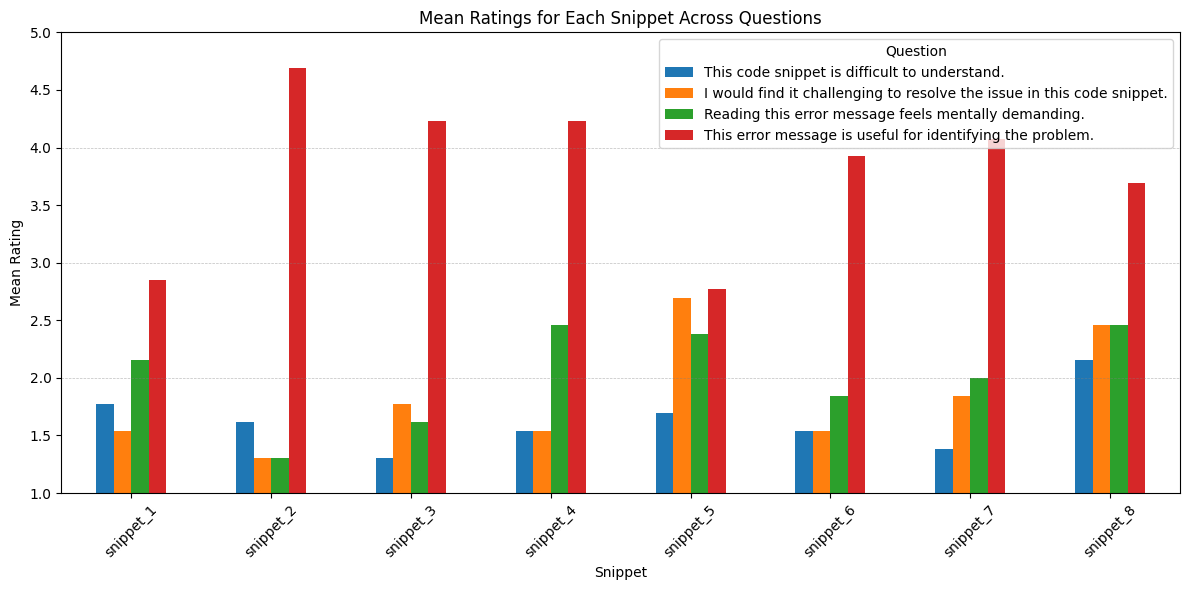

In [20]:
import matplotlib.pyplot as plt

# Plot the mean ratings for each snippet
mean_ratings_df.plot(kind='bar', figsize=(12, 6))
plt.title("Mean Ratings for Each Snippet Across Questions")
plt.xlabel("Snippet")
plt.ylabel("Mean Rating")
plt.ylim(1, 5)
plt.xticks(rotation=45)
plt.legend(title="Question")
plt.tight_layout()

# Add horizontal lines for each integer value on the y-axis
min_y = int(mean_ratings_df.min().min())
max_y = int(mean_ratings_df.max().max())
for y in range(min_y, max_y + 1):
    plt.axhline(y, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

## Step 4: Identify the "Fantastic Four" Snippets

Based on the previous rankings, which were visualized by means of a bar chart, we will now identify the top 4 snippets for each question. These will be our "Fantastic Four" snippets that we'll use in the main Prolific study.

In [21]:
# TBD

# Save the rankings and fantastic four snippets to CSV files for later use
rankings_df.to_csv("../data/rankings_per_question.csv", index=True)
mean_ratings_df.to_csv("../data/mean_ratings_per_question.csv", index=True)
fantastic_four_df.to_csv("../data/fantastic_four_snippets.csv", index=True)

print("Rankings, mean ratings, and fantastic four snippets saved to CSV files.")
